# Confusion Matrix and Sentiment Analysis


## Lending Club Dataset

The following code processes the *Lending Club Dataset* from [https://www.kaggle.com/datasets/mariiagusarova/preprocessed-lending-club-dataset-v2](kaggle).

__Run and comment the following instructions (fix them if needed). Inspect he dataframe?__

In [69]:
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np

In [64]:
# 
loan = pd.read_csv('loans.csv', low_memory=True)

__Run and comment the following instructions (fix them if needed). What kind of modeling exercise is performed?__

In [83]:
loan['loan_status'].value_counts()

loan_status
0.0    672377
1.0    176077
Name: count, dtype: int64

The objective here is to build a model to predict which loans will default (loan_status=1). It is a classification exercise.
 Since the number of regressors is fairly large it is natural to look for a machine learning approcah.


In [ ]:
#
features = loan.columns.to_list()
features.remove('loan_status')

In [66]:
#
df_train, df_test = train_test_split(loan, test_size=0.25, random_state=42)


/home/pablo/.local/opt/micromamba/envs/escp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#
clf = LogisticRegression()
clf.fit(df_train[features], df_train['loan_status'])

In [59]:
#
y_pred = clf.predict(df_test[features])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(df_test[features], df_test['loan_status'])))

Accuracy of logistic regression classifier on test set: 0.79


In [61]:
#
cal = sklearn.metrics.confusion_matrix(df_test['loan_status'], y_pred, labels=clf.classes_)
print(cal)

[[165146   2918]
 [ 41439   2611]]


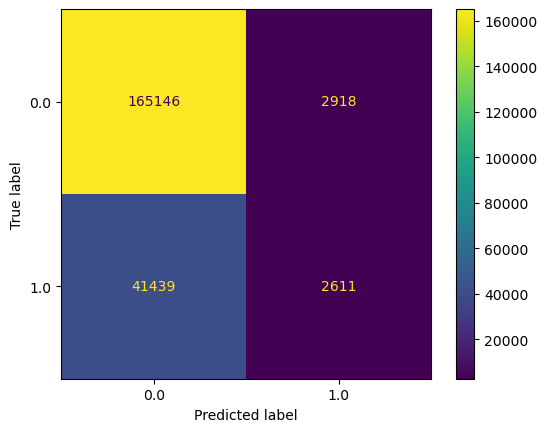

In [63]:
#
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cal, display_labels=clf.classes_)
disp.plot()

__For the confusion matrix that was just computed compute accuracy, precision, recall and f1 score (lookup the definitions if needed).__

In [2]:
# compute the different statistics (by hand or programmatically)

__Comment on the model validity__.

## The Dataset

We use the [News Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) from Kaggle.

1. __Import Dataset as a pandas dataframe. Remove rows where `selected_text` is not available.__

In [94]:
# the following command checks the current working directory 
# it should end with session_8
%pwd

'/home/pablo/Teaching/escp/dbe/tutorials/session_8'

In [104]:
import pandas
df = pandas.read_csv("Tweets.csv")

2. __Describe Dataset (text and graphs). What is the distribution of the various sentiment values?__

4. __Count the number of tweets mentionng `trump`__.

5. __Split Dataset into training, and test set.__

## Classifying tweets

The goal is now to to build a tweet classifier to predict a tweet sentiment, without any human input.

1. __Extract features from the training dataset. What do you do with non-words / punctuation?__

(hint: check the CountVectorizer function and the [tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on sklearn webpage.)

2. __Convert occurrencies to frequencies. Make another version with tf-idf.__

3. __Choose a classifier to predict the sentiment on the *validation* set. Compute the confusion matrix.__